assignment from https://cjtu.github.io/spirl/f21_a7.html

In [1]:
import timeit

import numpy as np
from numba import njit

In [2]:
# factorial funcs with different implementations
def factorial(n):
    if n == 1:
        return 1
    else:
        return n * factorial(n - 1)


@njit
def factorial_njit(n):
    if n == 1:
        return 1
    else:
        return n * factorial_njit(n - 1)


@njit(parallel=True)
def factorial_parallel_njit(n):
    if n == 1:
        return 1
    else:
        return n * factorial_parallel_njit(n - 1)


def factorial_numpy(n):
    arr = np.arange(1, n + 1)
    result = np.prod(arr)
    return result

In [3]:
# define the range of values for which to measure execution time
values = np.concatenate((np.arange(1, 11, 1, dtype=int),
                         np.arange(10, 101, 10, dtype=int),
                         np.arange(100, 1001, 100, dtype=int)))

# create lists for functions, labels, and timings
functions = [factorial,
             factorial_njit,
             factorial_parallel_njit,
             factorial_numpy]
labels = ['Factorial',
          'Factorial (Numba)',
          'Factorial (Numba Parallel)',
          'Factorial (NumPy)']
timings = np.zeros((len(values), len(functions)))

# measure execution time for each method and store in the timings array
for i, value in enumerate(values):
    for j, func in enumerate(functions):
        t = timeit.timeit(lambda: func(value), number=10000)
        timings[i, j] = t

/Users/fengshun/miniconda3/envs/py310/lib/python3.10/site-packages/numba/core/typed_passes.py:334: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.readthedocs.io/en/stable/user/parallel.html#diagnostics for help.

File "../../../../../../var/folders/xs/vmxskw896mx_w5ckd0pzvl7w0000gn/T/ipykernel_28387/3401114702.py", line 17:
<source missing, REPL/exec in use?>

  warnings.warn(errors.NumbaPerformanceWarning(msg,
/var/folders/xs/vmxskw896mx_w5ckd0pzvl7w0000gn/T/ipykernel_28387/3401114702.py:6: RuntimeWarning: overflow encountered in scalar multiply
  return n * factorial(n - 1)


 `parallel=True` of `Numba` is meant for specific use cases and cannot be used with recursive functions. Hence, `NumbaPerformanceWarning` is raised.

As JIT-compiled function ONLY needs to be compiled once, its performance improves as it doesn't have to go through the compilation process repeatedly. The first execution may take a bit longer due to compilation, but subsequent executions are much faster.
 

Notice that if you execute the cells above, you would probably get a different results. 

In [4]:
import matplotlib.pyplot as plt

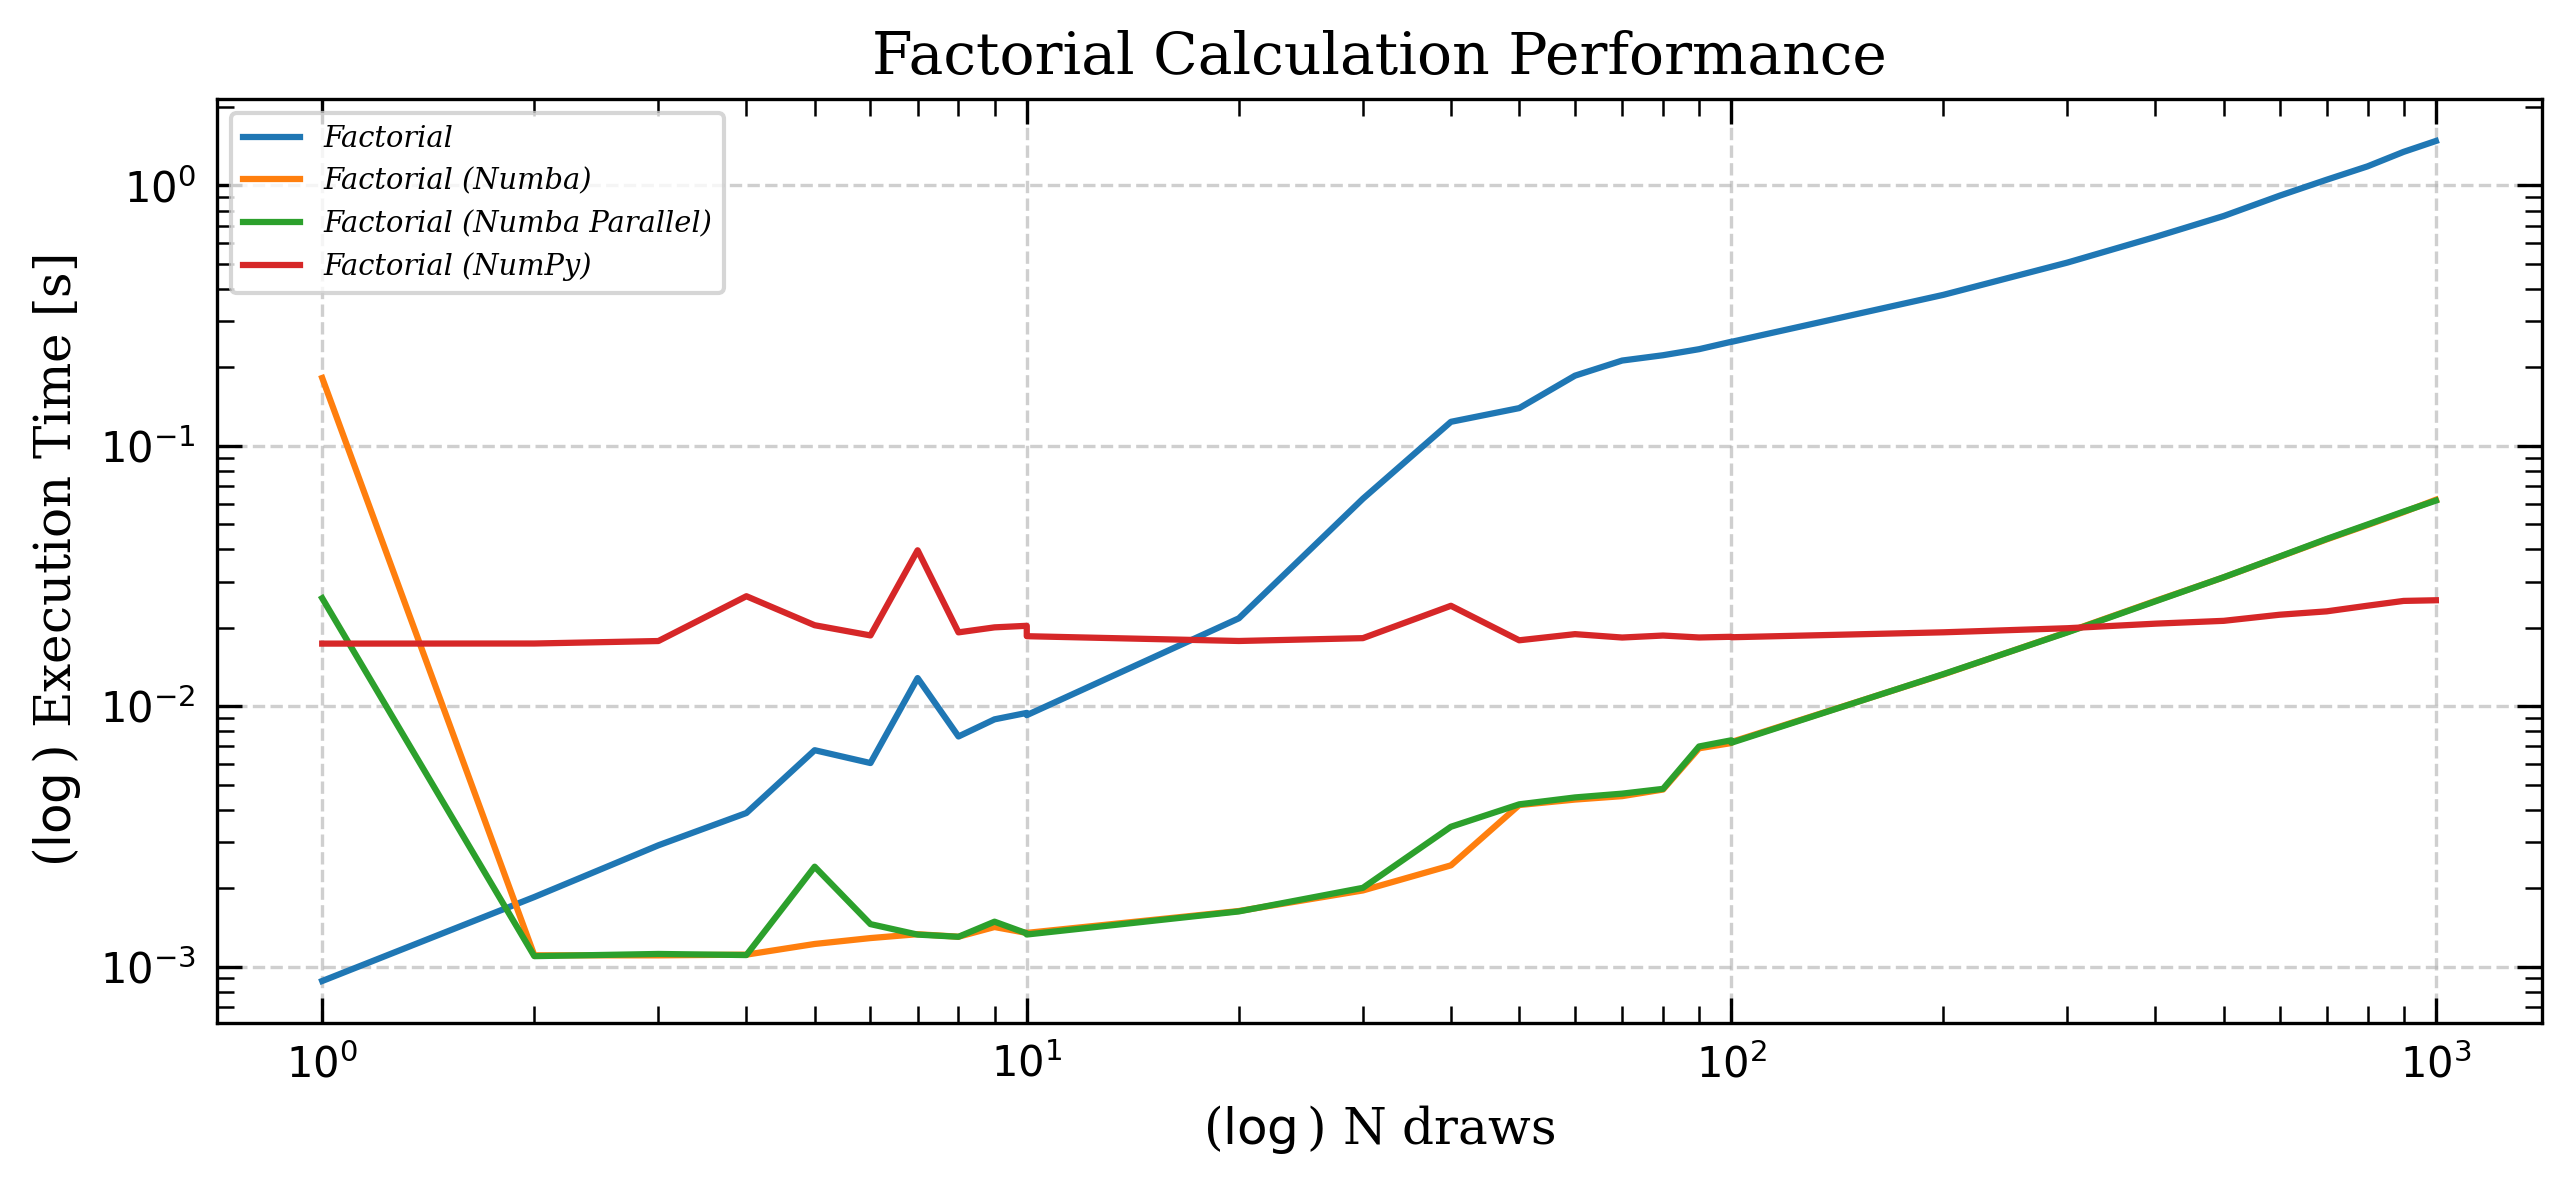

In [5]:
fig, axis = plt.subplots(1, 1, figsize=(10, 4), facecolor='white', dpi=300)

# plot the execution times
for j in range(len(labels)):
    axis.plot(values, timings[:, j], label=labels[j])

# set axis attributes
axis.tick_params(axis='both', right=True, top=True,
                 pad=5, direction='in', length=6, which='major')
axis.tick_params(axis='both', right=True, top=True,
                 pad=5, direction='in', length=4, which='minor')
axis.set_yscale('log')
axis.set_xscale('log')

axis.set_xticks(values, minor=True)

axis.legend(loc='upper left',
            prop={'family': 'serif',
                  'style': 'italic',
                  'size': 'x-small'},
            markerscale=1, frameon=True)

# add labels and titles
axis.set_xlabel('($\log$) N draws',
                fontdict={'family': 'serif',
                          'size': 12})
axis.set_ylabel('($\log$) Execution Time [s]',
                fontdict={'family': 'serif',
                          'size': 12})
axis.set_title('Factorial Calculation Performance',
               fontdict={'family': 'serif',
                         'size': 14})

# add a background grid
axis.grid(True, linestyle='--', alpha=.6, zorder=-1)